---

_You are currently looking at **version 1.1** of this notebook. To download notebooks and datafiles, as well as get help on Jupyter notebooks in the Coursera platform, visit the [Jupyter Notebook FAQ](https://www.coursera.org/learn/python-social-network-analysis/resources/yPcBs) course resource._

---

<a target="_blank" href="https://colab.research.google.com/github/LuisAngelMendozaVelasco/Applied_Data_Science_with_Python_Specialization/blob/main/Applied_Social_Network_Analysis_in_Python/Week1/Labs/Assignment 1.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>

In [1]:
%%bash
# If running in Google Colab

# mkdir data
# wget https://raw.githubusercontent.com/LuisAngelMendozaVelasco/Applied_Data_Science_with_Python_Specialization/main/Applied_Social_Network_Analysis_in_Python/Week1/Labs/data/Employee_Movie_Choices.txt -P ./data
# wget https://raw.githubusercontent.com/LuisAngelMendozaVelasco/Applied_Data_Science_with_Python_Specialization/main/Applied_Social_Network_Analysis_in_Python/Week1/Labs/data/Employee_Relationships.txt -P ./data

# Assignment 1 - Creating and Manipulating Graphs

Eight employees at a small company were asked to choose 3 movies that they would most enjoy watching for the upcoming company movie night. These choices are stored in the file `Employee_Movie_Choices.txt`.

A second file, `Employee_Relationships.txt`, has data on the relationships between different coworkers. 

The relationship score has value of `-100` (Enemies) to `+100` (Best Friends). A value of zero means the two employees haven't interacted or are indifferent.

Both files are tab delimited.

In [2]:
import networkx as nx
import pandas as pd
import numpy as np
from networkx.algorithms import bipartite
import matplotlib.pyplot as plt
# %matplotlib notebook

# This is the set of employees
employees = set(['Pablo',
                 'Lee',
                 'Georgia',
                 'Vincent',
                 'Andy',
                 'Frida',
                 'Joan',
                 'Claude'])

# This is the set of movies
movies = set(['The Shawshank Redemption',
              'Forrest Gump',
              'The Matrix',
              'Anaconda',
              'The Social Network',
              'The Godfather',
              'Monty Python and the Holy Grail',
              'Snakes on a Plane',
              'Kung Fu Panda',
              'The Dark Knight',
              'Mean Girls'])

# you can use the following function to plot graphs
# make sure to comment it out before submitting to the autograder
def plot_graph(G, weight_name=None):
    '''
    G: a networkx G
    weight_name: name of the attribute for plotting edge weights (if G is weighted)
    '''
    plt.figure(figsize=(15, 15))
    pos = nx.spring_layout(G)
    edges = G.edges()
    weights = None
    
    if weight_name:
        weights = [int(G[u][v][weight_name]) for u, v in edges]
        labels = nx.get_edge_attributes(G, weight_name)
        nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
        nx.draw_networkx(G, pos, edgelist=edges, width=weights)
    else:
        nx.draw_networkx(G, pos, edgelist=edges)

### Question 1

Using NetworkX, load in the bipartite graph from `Employee_Movie_Choices.txt` and return that graph.

*This function should return a networkx graph with 19 nodes and 24 edges*

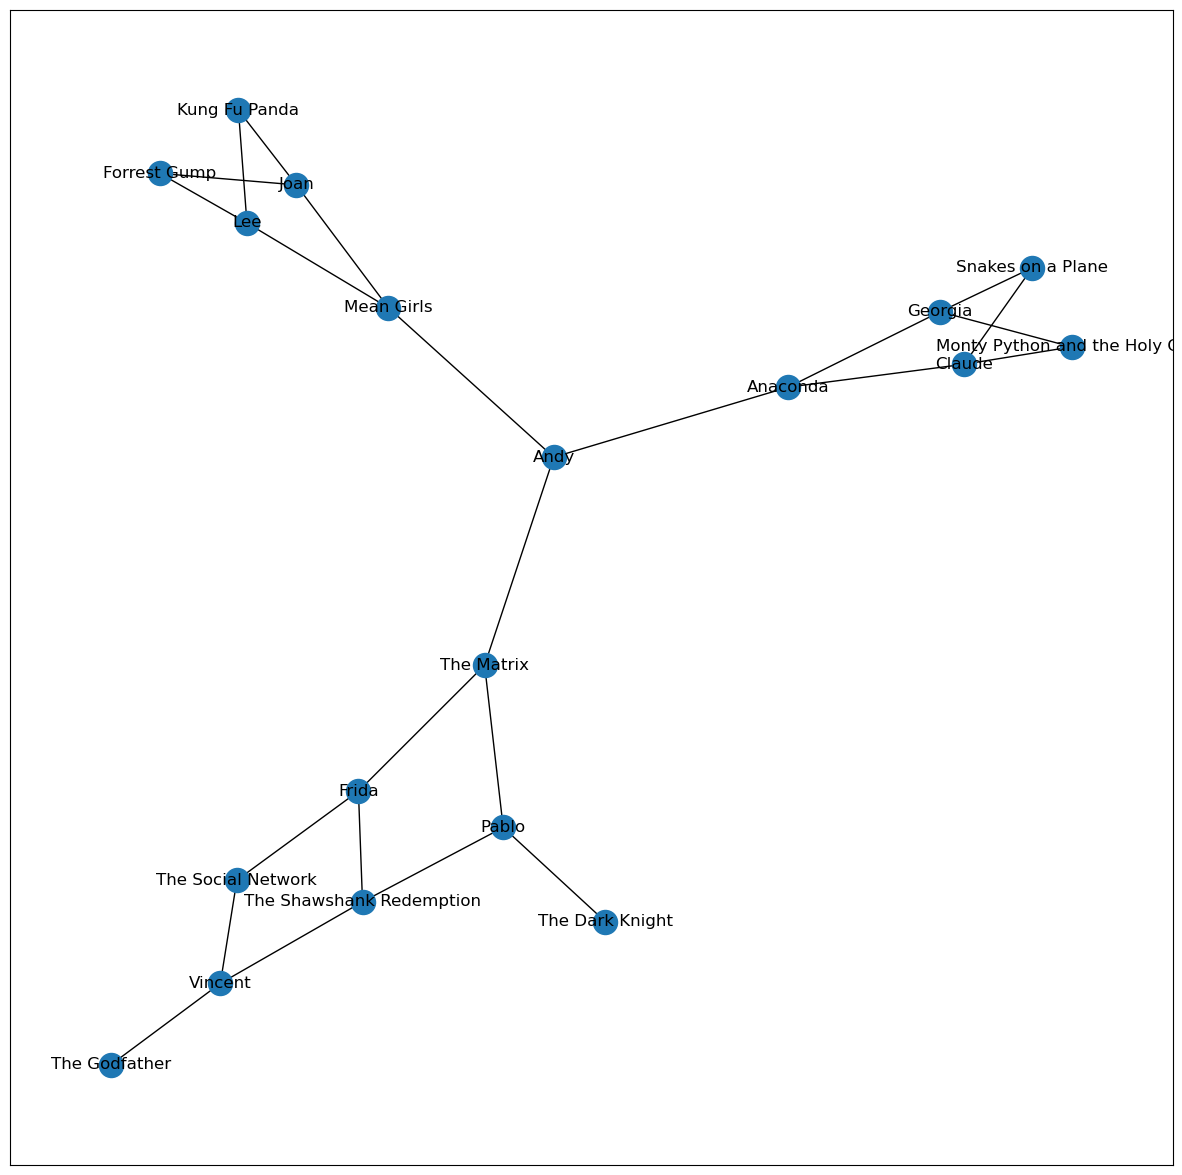

In [3]:
def answer_one():
    # Your Code Here
    G = nx.read_edgelist('./data/Employee_Movie_Choices.txt', delimiter='\t')
    B = nx.Graph()
    B.add_nodes_from(employees, bipartite=0)
    B.add_nodes_from(movies, bipartite=1)
    B.add_edges_from(G.edges())
    
    return B # Your Answer Here

plot_graph(answer_one())

### Question 2

Using the graph from the previous question, add nodes attributes named `'type'` where movies have the value `'movie'` and employees have the value `'employee'` and return that graph.

*This function should return a networkx graph with node attributes `{'type': 'movie'}` or `{'type': 'employee'}`*

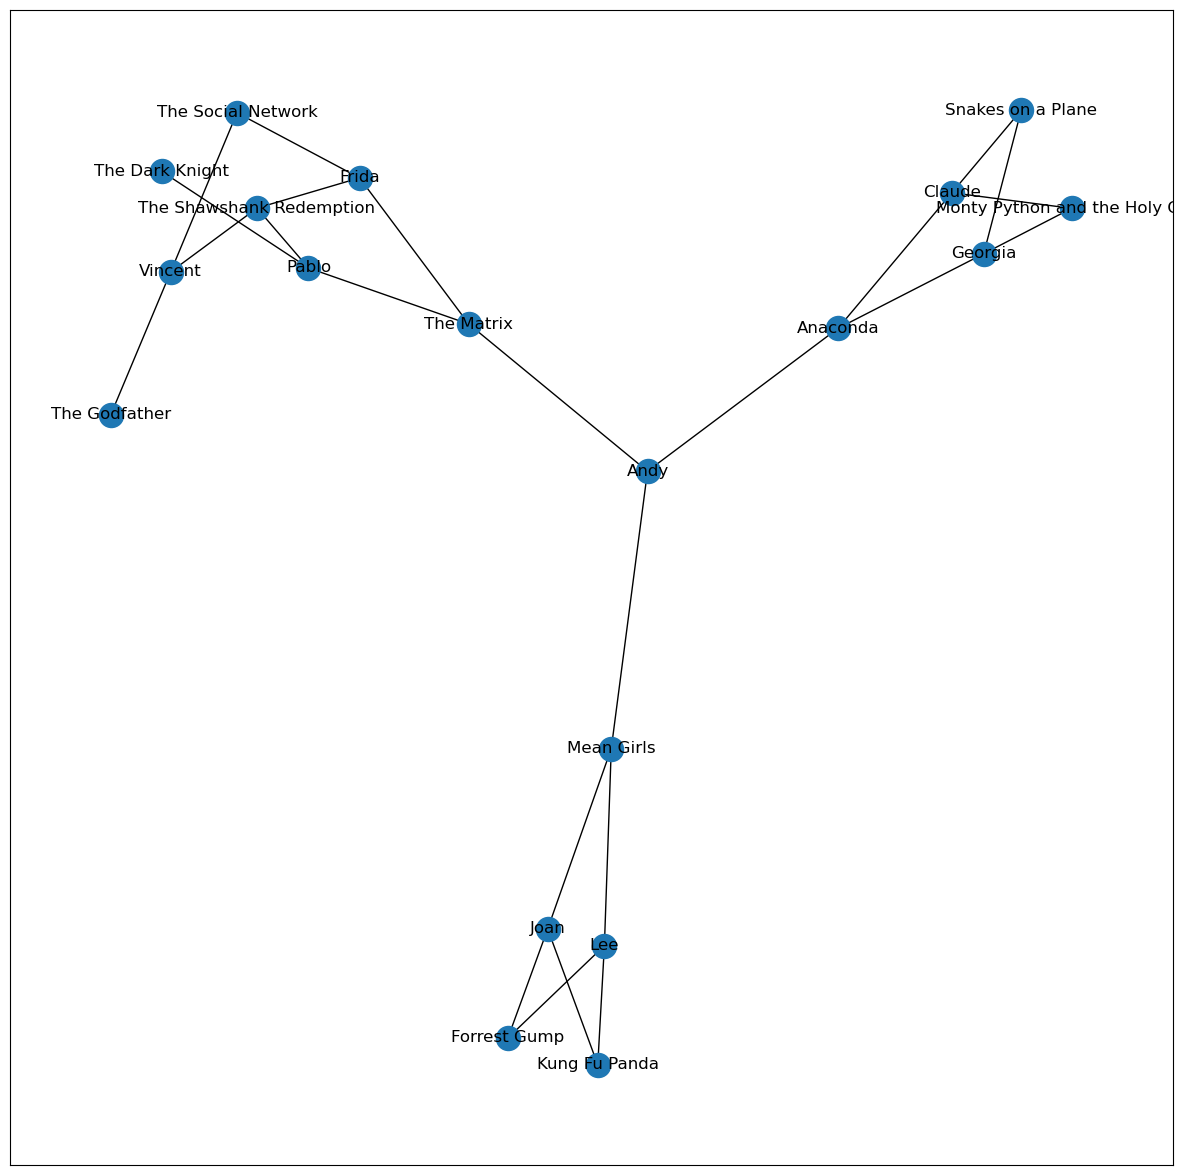

In [4]:
def answer_two():
    # Your Code Here
    B = answer_one()
    attr = {n: 'employee' if n in employees else 'movie' for n in B.nodes()}
    nx.set_node_attributes(B, name='type', values=attr)
    
    return B # Your Answer Here

plot_graph(answer_two())

### Question 3

Find a weighted projection of the graph from `answer_two` which tells us how many movies different pairs of employees have in common.

*This function should return a weighted projected graph.*

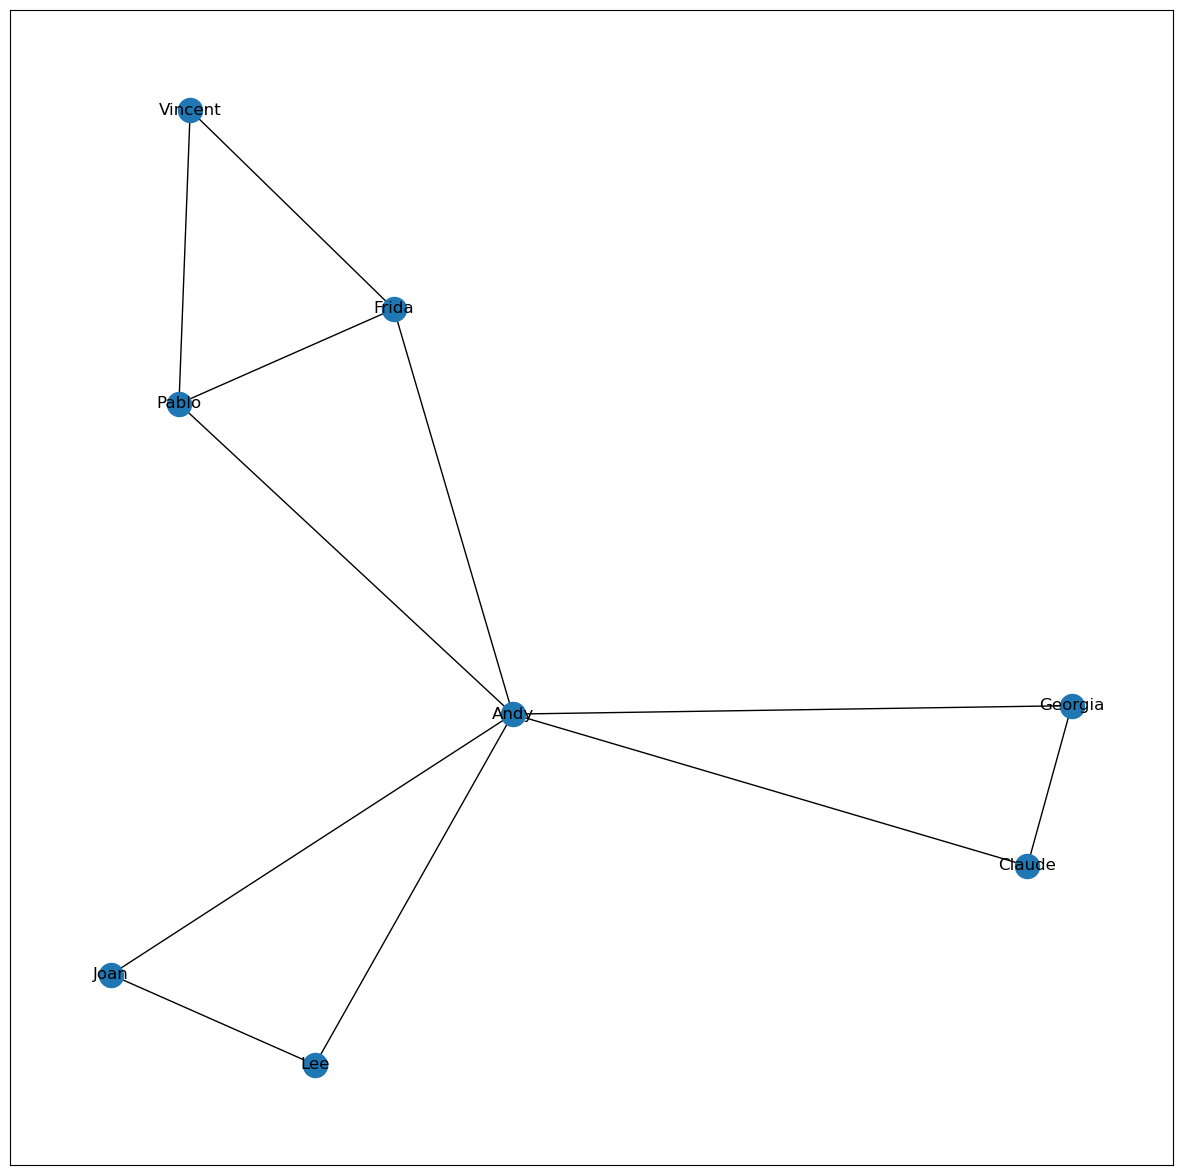

In [5]:
def answer_three():
    # Your Code Here
    B = answer_two()
    WP = bipartite.weighted_projected_graph(B, employees)
    
    return WP # Your Answer Here

plot_graph(answer_three())

### Question 4

Suppose you'd like to find out if people that have a high relationship score also like the same types of movies.

Find the Pearson correlation ( using `DataFrame.corr()` ) between employee relationship scores and the number of movies they have in common. If two employees have no movies in common it should be treated as a 0, not a missing value, and should be included in the correlation calculation.

*This function should return a float.*

In [6]:
def answer_four():
    # Your Code Here
    rel = nx.read_edgelist('./data/Employee_Relationships.txt', data=[('relationship_score', int)])
    rel_df = pd.DataFrame(rel.edges(data=True), columns=['From', 'To', 'relationship_score'])
    
    movie = answer_three()
    movie_df = pd.DataFrame(movie.edges(data=True), columns=['From', 'To', 'movies_score'])
    movie_copy_df = movie_df.copy()
    movie_copy_df.rename(columns={"From": "To", "To": "From"}, inplace=True)
    movie_final_df = pd.concat([movie_df, movie_copy_df])

    final_df = pd.merge(movie_final_df, rel_df, on = ['From', 'To'], how='right')
    final_df['movies_score'] = final_df['movies_score'].map(lambda x: x['weight'] if type(x) == dict else None)
    final_df['relationship_score'] = final_df['relationship_score'].map(lambda x: x['relationship_score'])
    final_df.fillna(value={"movies_score": 0}, inplace=True)
    
    return final_df['movies_score'].corr(final_df['relationship_score']) # Your Answer Here

answer_four()

0.7883962221733474